In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
%matplotlib inline
import itertools
import time
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')
import statsmodels.formula.api as smf

# Loading datasets

In [ ]:
import pandas as pd

# Load the data for New Hampshire from each file
data_2020 = pd.read_excel("2020_smd_hourly.xlsx", sheet_name='NH')
data_2021 = pd.read_excel("2021_smd_hourly.xlsx", sheet_name='NH')
data_2022 = pd.read_excel("2022_smd_hourly.xlsx", sheet_name='NH')

# Display the first few rows of each dataset to confirm
data_2020.head(), data_2021.head(), data_2022.head()

(        Date  Hr_End  DA_Demand  RT_Demand  DA_LMP  DA_EC  DA_CC  DA_MLC  \
 0 2020-01-01       1     1045.2   1080.184   23.66  23.54   0.02    0.10   
 1 2020-01-01       2     1022.0   1034.726   18.84  18.75   0.02    0.07   
 2 2020-01-01       3      952.7   1005.343   16.68  16.67   0.01    0.00   
 3 2020-01-01       4      967.2   1000.609   16.57  16.55   0.01    0.01   
 4 2020-01-01       5      961.8   1011.067   15.62  15.61   0.01    0.00   
 
    RT_LMP  RT_EC  RT_CC  RT_MLC  Dry_Bulb  Dew_Point  
 0   23.41  23.21    0.0    0.20        32         30  
 1   18.65  18.54    0.0    0.11        34         27  
 2   17.73  17.65    0.0    0.08        34         26  
 3   17.24  17.16    0.0    0.08        33         24  
 4   17.19  17.11    0.0    0.08        31         24  ,
         Date  Hr_End  DA_Demand  RT_Demand  DA_LMP  DA_EC  DA_CC  DA_MLC  \
 0 2021-01-01       1     1066.2   1142.187   24.53  24.24   0.20    0.09   
 1 2021-01-01       2     1025.1   1096.230  

In [ ]:
import pandas as pd

# Load the datasets for 2020, 2021, and 2022
file_paths = {
    "2020": "2020_smd_hourly.xlsx",
    "2021": "2021_smd_hourly.xlsx",
    "2022": "2022_smd_hourly.xlsx"
}

# Attempting to read the New Hampshire (NH) sheet from each file
nh_data = {}

for year, file_path in file_paths.items():
    try:
        nh_data[year] = pd.read_excel(file_path, sheet_name='NH')
        print(f"Loaded data for {year}")
    except Exception as e:
        print(f"Error loading data for {year}: {e}")

# Checking if the data was loaded successfully
nh_data.keys()

Loaded data for 2020
Loaded data for 2021
Loaded data for 2022


dict_keys(['2020', '2021', '2022'])

# Data Wrangling

# Missing Values/ Data Types check

In [ ]:
# Displaying the first few rows, data types, and checking for missing values in the 2020 dataset
nh_2020_info = {
    "First Few Rows": nh_data['2020'].head(),
    "Data Types": nh_data['2020'].dtypes,
    "Missing Values": nh_data['2020'].isnull().sum()
}

nh_2020_info

{'First Few Rows':         Date  Hr_End  DA_Demand  RT_Demand  DA_LMP  DA_EC  DA_CC  DA_MLC  \
 0 2020-01-01       1     1045.2   1080.184   23.66  23.54   0.02    0.10   
 1 2020-01-01       2     1022.0   1034.726   18.84  18.75   0.02    0.07   
 2 2020-01-01       3      952.7   1005.343   16.68  16.67   0.01    0.00   
 3 2020-01-01       4      967.2   1000.609   16.57  16.55   0.01    0.01   
 4 2020-01-01       5      961.8   1011.067   15.62  15.61   0.01    0.00   
 
    RT_LMP  RT_EC  RT_CC  RT_MLC  Dry_Bulb  Dew_Point  
 0   23.41  23.21    0.0    0.20        32         30  
 1   18.65  18.54    0.0    0.11        34         27  
 2   17.73  17.65    0.0    0.08        34         26  
 3   17.24  17.16    0.0    0.08        33         24  
 4   17.19  17.11    0.0    0.08        31         24  ,
 'Data Types': Date         datetime64[ns]
 Hr_End                int64
 DA_Demand           float64
 RT_Demand           float64
 DA_LMP              float64
 DA_EC               f

In [ ]:
# Columns to be removed (all pricing-related columns)
columns_to_remove = ['DA_LMP', 'DA_EC', 'DA_CC', 'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'DA_Demand']

# Removing the pricing-related columns from each dataset
nh_data_cleaned = {year: data.drop(columns=columns_to_remove) for year, data in nh_data.items()}

# Combining the datasets into a single dataset
combined_nh_data = pd.concat(nh_data_cleaned.values(), ignore_index=True)

# Displaying the first few rows of the combined dataset
combined_nh_data.head()

,Date,Hr_End,RT_Demand,Dry_Bulb,Dew_Point
0,2020-01-01,1,1080.184,32,30
1,2020-01-01,2,1034.726,34,27
2,2020-01-01,3,1005.343,34,26
3,2020-01-01,4,1000.609,33,24
4,2020-01-01,5,1011.067,31,24


# EDA

In [ ]:
# Calculating descriptive statistics for the updated combined dataset
descriptive_stats = combined_nh_data.describe()

# Displaying the descriptive statistics
descriptive_stats

,Date,Hr_End,RT_Demand,Dry_Bulb,Dew_Point
count,26304,26304.000000,26304.000000,26304.000000,26304.000000
mean,2021-07-01 12:00:00,12.500000,1295.402554,49.142868,37.412979
min,2020-01-01 00:00:00,1.000000,769.478000,-9.000000,-19.000000
25%,2020-09-30 18:00:00,6.750000,1110.889000,34.000000,23.000000
50%,2021-07-01 12:00:00,12.500000,1276.953500,49.000000,37.000000
75%,2022-04-01 06:00:00,18.250000,1449.707500,65.000000,55.000000
max,2022-12-31 00:00:00,24.000000,2462.235000,97.000000,75.000000
std,NaN,6.922318,262.760623,19.677216,19.708705


The descriptive statistics for the key variables in our dataset are as follows:

**Hr_End** (Hour Ending):

Ranges from 1 to 24, representing each hour of the day.
The mean and median (50th percentile) are both 12.5, indicating a uniform distribution across all hours.

**RT_Demand** (Real-Time Demand):

Varies between approximately 769.5 and 2462.2, with a mean of around 1295.4 and a standard deviation of about 262.8.
This shows that there's significant variation in hourly power demand.

**Dry_Bulb** (Temperature in °F):

Ranges from -9°F to 97°F, with an average of about 49.1°F.
This indicates a wide range of temperatures throughout the year.

**Dew_Point** (Dew Point in °F):
Ranges from -19°F to 75°F, with an average of about 37.4°F.
This also shows a wide range of humidity conditions.

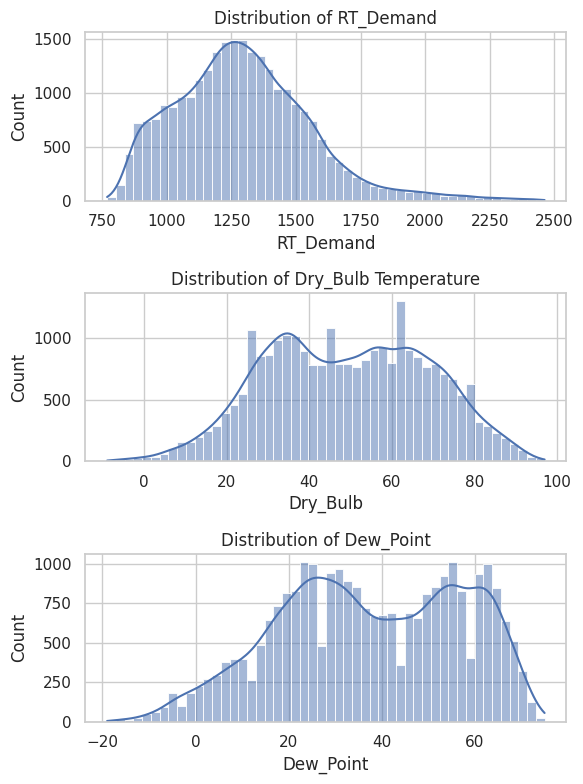

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions for RT_Demand, Dry_Bulb, and Dew_Point
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

# Plot for RT_Demand
sns.histplot(combined_nh_data['RT_Demand'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of RT_Demand')

# Plot for Dry_Bulb
sns.histplot(combined_nh_data['Dry_Bulb'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Dry_Bulb Temperature')

# Plot for Dew_Point
sns.histplot(combined_nh_data['Dew_Point'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Dew_Point')

plt.tight_layout()
plt.show()

The distribution plots for RT_Demand, Dry_Bulb, and Dew_Point reveal the following patterns:

**RT_Demand**: The distribution appears to be roughly normal but with some skewness, indicating that there are times with exceptionally high or low power demands compared to the average.

**Dry_Bulb** (Temperature): The temperature distribution shows a bimodal pattern, likely reflecting the seasonal changes over the year. This suggests distinct warmer and cooler periods, which is typical in a place with four distinct seasons.

Dew_Point: The distribution of the dew point also shows a somewhat bimodal pattern, similar to the temperature, reflecting seasonal humidity variations.

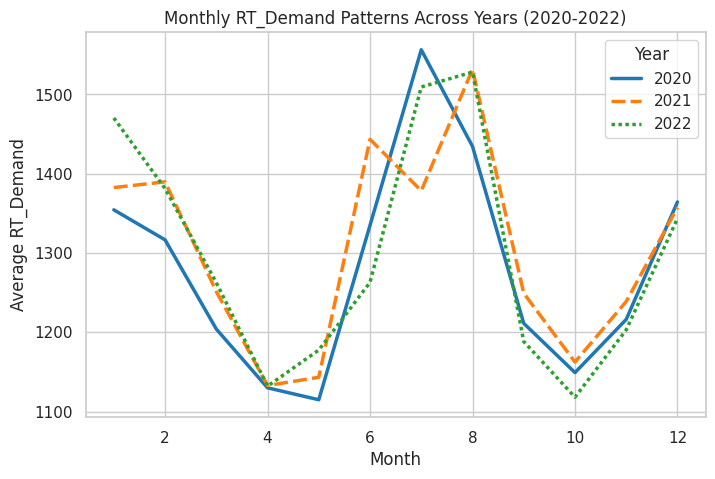

In [ ]:
# Creating a column for year and month for easier analysis
combined_nh_data['Year'] = combined_nh_data['Date'].dt.year
combined_nh_data['Month'] = combined_nh_data['Date'].dt.month

# Grouping data by year and month to see monthly patterns
monthly_rt_demand = combined_nh_data.groupby(['Year', 'Month'])['RT_Demand'].mean().unstack(level=0)

# Plotting the monthly patterns in RT_Demand across the years
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_rt_demand, palette="tab10", linewidth=2.5)
plt.title('Monthly RT_Demand Patterns Across Years (2020-2022)')
plt.xlabel('Month')
plt.ylabel('Average RT_Demand')
plt.show()

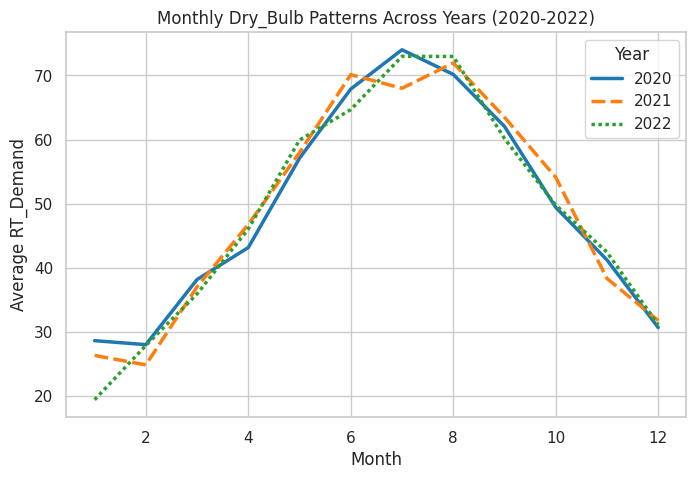

In [ ]:
# Creating a column for year and month for easier analysis
combined_nh_data['Year'] = combined_nh_data['Date'].dt.year
combined_nh_data['Month'] = combined_nh_data['Date'].dt.month

# Grouping data by year and month to see monthly patterns
monthly_rt_demand = combined_nh_data.groupby(['Year', 'Month'])['Dry_Bulb'].mean().unstack(level=0)

# Plotting the monthly patterns in RT_Demand across the years
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_rt_demand, palette="tab10", linewidth=2.5)
plt.title('Monthly Dry_Bulb Patterns Across Years (2020-2022)')
plt.xlabel('Month')
plt.ylabel('Average RT_Demand')
plt.show()

Summary of Preliminary Analysis:

Data Structure: Our dataset now includes Date, Hr_End, RT_Demand, Dry_Bulb, and Dew_Point as per the project requirements.

**Descriptive Stats**: We observed significant variability in RT_Demand and wide ranges in temperature and dew point.

**Distributions**: RT_Demand shows a roughly normal distribution with skewness, and both Dry_Bulb and Dew_Point show bimodal distributions, reflecting seasonal changes.

**Temporal Patterns**: There are clear seasonal patterns in power demand, with variations across years.

# Time Series Plot of Hourly Load in New Hampshire

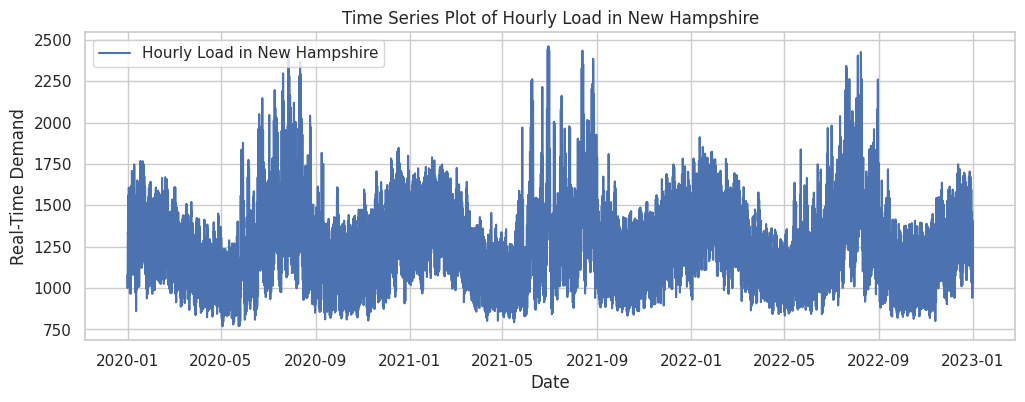

In [ ]:
# Modifying the code for combined_nh_data dataset
combined_nh_data['DATETIME'] = pd.to_datetime(combined_nh_data['Date']) + pd.to_timedelta(combined_nh_data['Hr_End'] - 1, unit='h')
combined_nh_data_sorted = combined_nh_data.sort_values('DATETIME')
combined_nh_data_sorted.set_index('DATETIME', inplace=True)

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(combined_nh_data_sorted['RT_Demand'], label='Hourly Load in New Hampshire')
plt.xlabel('Date')
plt.ylabel('Real-Time Demand')
plt.title('Time Series Plot of Hourly Load in New Hampshire')
plt.legend()
plt.grid(True)
plt.show()

### Daily Hour Trends and Some Interesting Transformation

Text(0.5, 1.0, 'Daily Time Series Plot of Load against Hours')

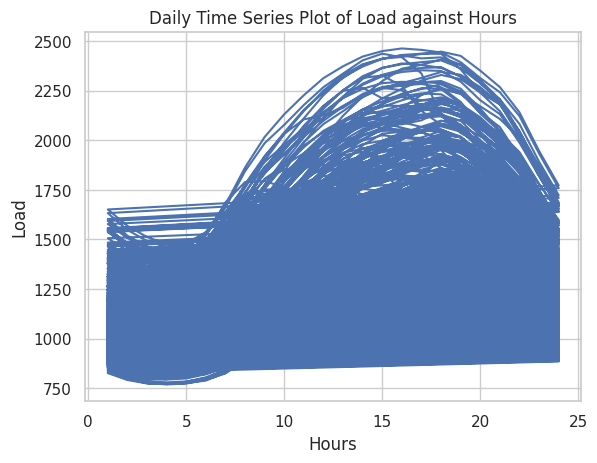

In [ ]:
plt.plot(combined_nh_data["Hr_End"], combined_nh_data["RT_Demand"]);
plt.xlabel('Hours')
plt.ylabel('Load')
plt.title('Daily Time Series Plot of Load against Hours')

Find an hours time series plot of hours against load. We notice two good features: a peak that appears somewhat symmetrical. Let's try taking the distance from the center.

Text(0.5, 1.0, 'Time Series Plot of Load and Hours Away From 18 Hours')

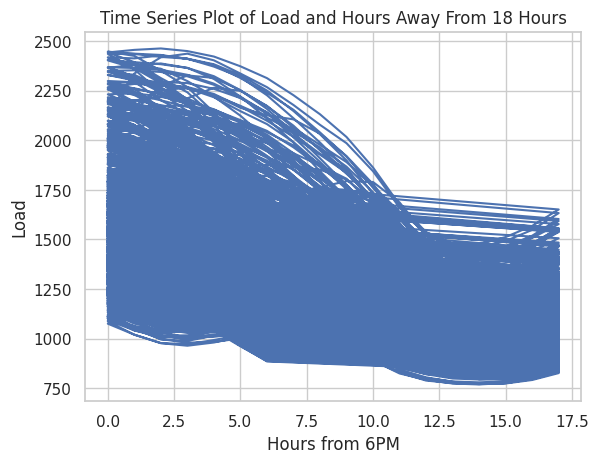

In [ ]:
import math
plt.plot((combined_nh_data["Hr_End"]-18).apply(abs), combined_nh_data["RT_Demand"]);
plt.xlabel('Hours from 6PM')
plt.ylabel('Load')
plt.title("Time Series Plot of Load and Hours Away From 18 Hours")

It appears that the general shape we were looking for is present, but don't have a good shape. For now, the distance from center function (and its transformations) don't look especially promising.

# Load vs temp plot

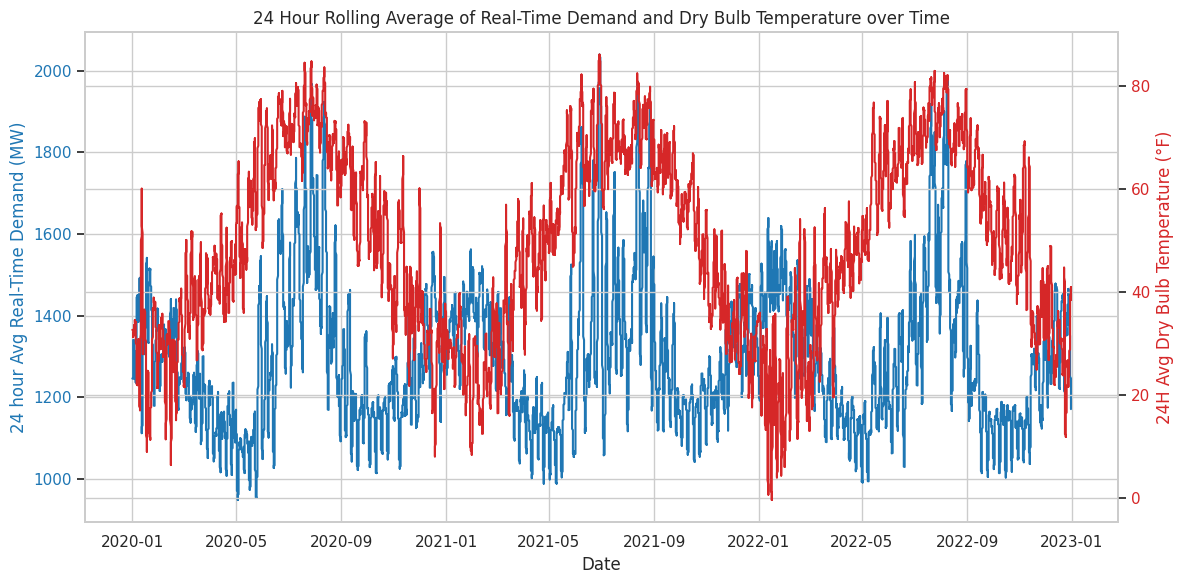

In [ ]:
# Calculating 24 hour rolling averages for RT_Demand and Dry_Bulb
combined_nh_data['RT_Demand_24h_avg'] = combined_nh_data['RT_Demand'].rolling(window=24).mean()
combined_nh_data['Dry_Bulb_24h_avg'] = combined_nh_data['Dry_Bulb'].rolling(window=24).mean()

# Creating a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting 24 hour rolling average of RT_Demand vs Date
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('24 hour Avg Real-Time Demand (MW)', color=color)
ax1.plot(combined_nh_data['Date'], combined_nh_data['RT_Demand_24h_avg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for 24 hour rolling average of Dry_Bulb vs Date
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('24H Avg Dry Bulb Temperature (°F)', color=color)
ax2.plot(combined_nh_data['Date'], combined_nh_data['Dry_Bulb_24h_avg'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and showing the plot
plt.title('24 Hour Rolling Average of Real-Time Demand and Dry Bulb Temperature over Time')
fig.tight_layout()
plt.show()


# Matrix Scatterplot for Hr_End, Dry_Bulb, Dew_Point

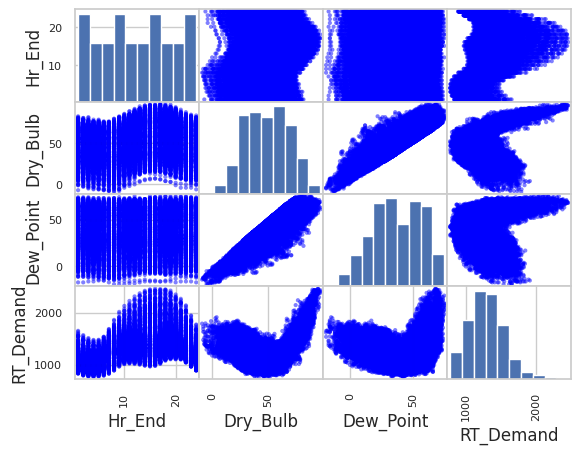

,Hr_End,Dry_Bulb,Dew_Point,RT_Demand
Hr_End,1.000000,0.174121,0.014022,0.430536
Dry_Bulb,0.174121,1.000000,0.878305,0.252229
Dew_Point,0.014022,0.878305,1.000000,0.117405
RT_Demand,0.430536,0.252229,0.117405,1.000000


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Selecting three numerical features
# features = ['Hr_End', 'Dry_Bulb', 'Dew_Point']
features = ['Hr_End', 'Dry_Bulb', 'Dew_Point', 'RT_Demand']

# Plotting the scatter matrix with the selected features
scatter_matrix(combined_nh_data[features], color='blue')
plt.show()

# Displaying the correlation matrix of the selected features
combined_nh_data[features].corr()

Dry_Bulb and Dew_Point have a high correlation (0.878305), indicating a strong positive relationship.

# Boxplot of RT_Demand grouped by Month

<Figure size 1200x600 with 0 Axes>

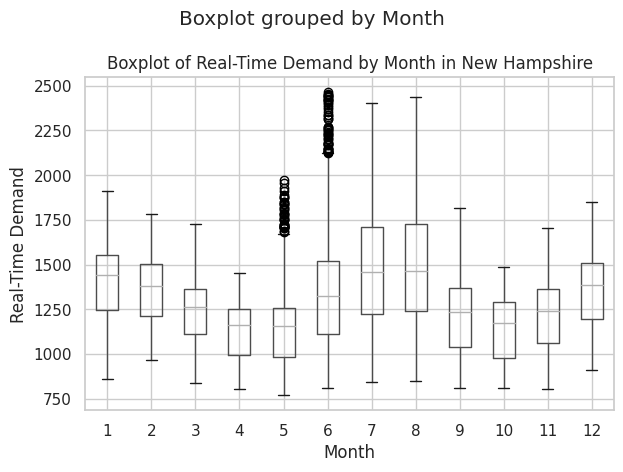

In [ ]:
combined_nh_data['Month'] = pd.to_datetime(combined_nh_data['Date']).dt.month
plt.figure(figsize=(12, 6))
combined_nh_data.boxplot(column=['RT_Demand'], by=['Month'])
plt.title('Boxplot of Real-Time Demand by Month in New Hampshire')
plt.xlabel('Month')
plt.ylabel('Real-Time Demand')
plt.tight_layout()
plt.show();

# Boxplot of RT_Demand grouped by Day_of_Week

In [ ]:
combined_nh_data['Day_of_Week'] = combined_nh_data['Date'].dt.dayofweek

<Figure size 1200x600 with 0 Axes>

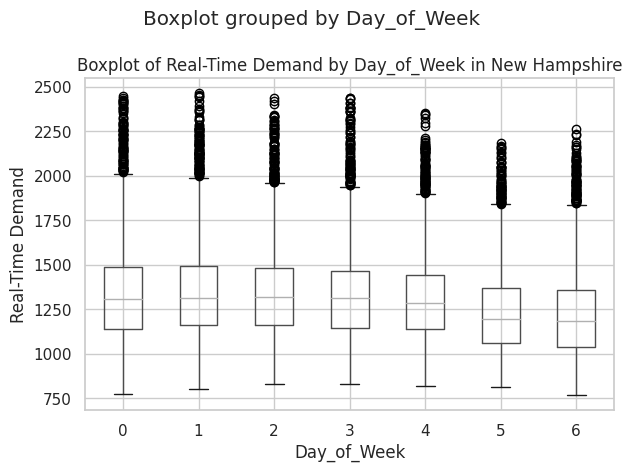

In [ ]:
plt.figure(figsize=(12, 6))
combined_nh_data.boxplot(column=['RT_Demand'], by=['Day_of_Week'])
plt.title('Boxplot of Real-Time Demand by Day_of_Week in New Hampshire')
plt.xlabel('Day_of_Week')
plt.ylabel('Real-Time Demand')
plt.tight_layout()
plt.show();

#Holiday Analysis

In [ ]:
#Instantiating a variable for holidays
import holidays
combined_nh_data["Is_holiday"]=combined_nh_data['Date'].apply(lambda x: x in holidays.CountryHoliday("US"))

Text(0, 0.5, 'Load')

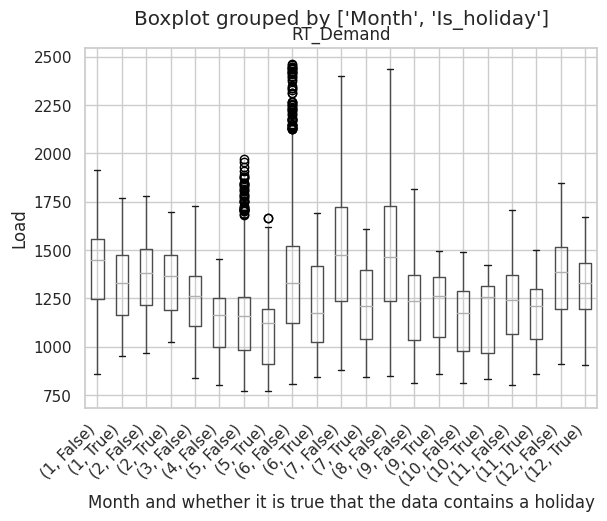

In [ ]:
combined_nh_data.boxplot(column=['RT_Demand'], by=["Month",'Is_holiday']);

plt.xticks(rotation=45, ha='right');

plt.xlabel('Month and whether it is true that the data contains a holiday')
plt.ylabel('Load')



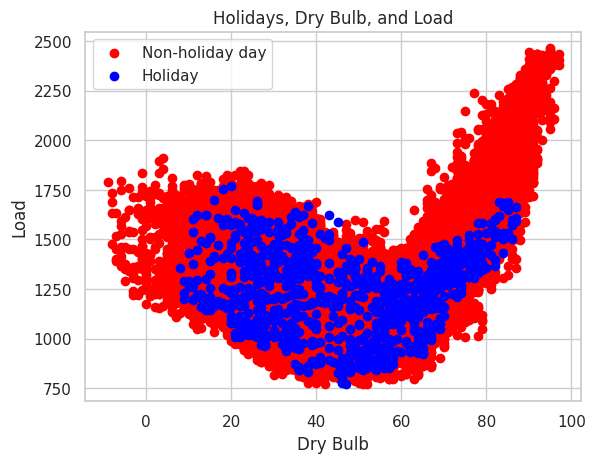

In [ ]:
# Scatterplot for weekends
plt.scatter(combined_nh_data[combined_nh_data['Is_holiday'] == False]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Is_holiday'] ==  False]['RT_Demand'],
            color='red', label='Non-holiday day')
plt.scatter(combined_nh_data[combined_nh_data['Is_holiday'] == True]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Is_holiday'] == True]['RT_Demand'],
            color='blue', label='Holiday')
plt.xlabel('Dry Bulb')
plt.ylabel('Load')
plt.title('Holidays, Dry Bulb, and Load')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Temperature Analysis

Text(0.5, 1.0, 'Scatterplot of Load and Dew Point')

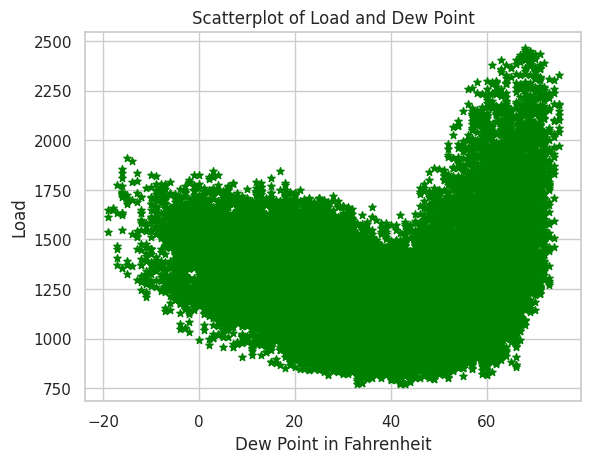

In [ ]:
plt.scatter(combined_nh_data['Dew_Point'], combined_nh_data['RT_Demand'], label= "stars", color= "green",
            marker= "*", s=30);
plt.xlabel('Dew Point in Fahrenheit')
plt.ylabel('Load')
plt.title("Scatterplot of Load and Dew Point")


Text(0.5, 1.0, 'Scatterplot of Load and Dry Bulb')

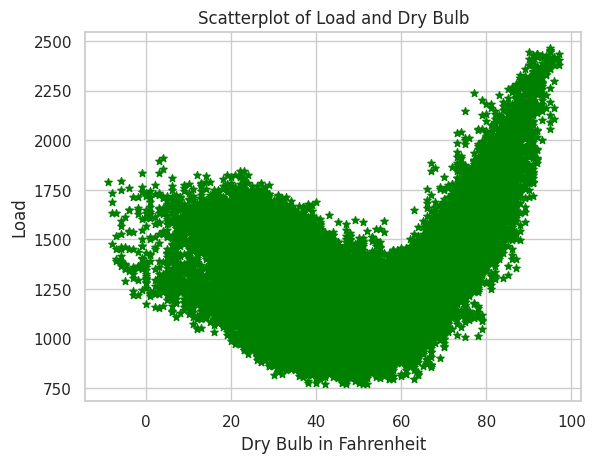

In [ ]:
plt.scatter(combined_nh_data['Dry_Bulb'], combined_nh_data['RT_Demand'], label= "stars", color= "green",
            marker= "*", s=30);
plt.xlabel('Dry Bulb in Fahrenheit')
plt.ylabel('Load')
plt.title("Scatterplot of Load and Dry Bulb")


Let's attempt to linearize the data. Two strategies:

1. Absolute value function (distance from center)
2. Squared function and cubed function
3. Part-wise version of absolute value function (distance from center + and distance from center -)

We will plot dew point scatterplots to see potential trends.

Text(0.5, 1.0, 'Scatterplot of Load and Dew Point Distance from Center')

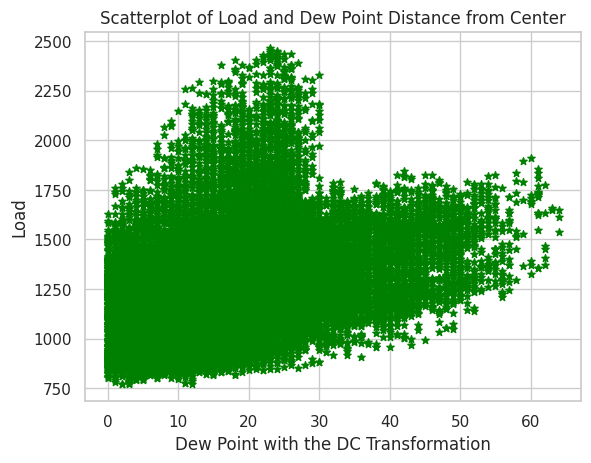

In [ ]:
import math
plt.scatter((combined_nh_data['Dew_Point']-45).apply(abs), combined_nh_data['RT_Demand'], label= "stars", color= "green",
            marker= "*", s=30);
plt.xlabel('Dew Point with the DC Transformation')
plt.ylabel('Load')
plt.title("Scatterplot of Load and Dew Point Distance from Center")

Text(0.5, 1.0, 'Scatterplot of Load and Dew Point Squared')

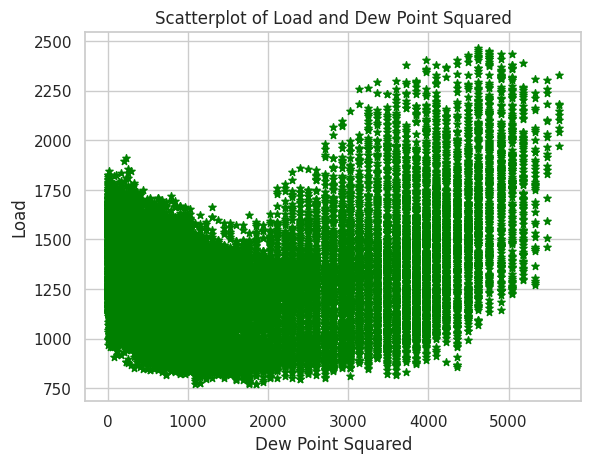

In [ ]:
plt.scatter(combined_nh_data['Dew_Point']**2, combined_nh_data['RT_Demand'], label= "stars", color= "green",
            marker= "*", s=30);
plt.xlabel('Dew Point Squared')
plt.ylabel('Load')
plt.title("Scatterplot of Load and Dew Point Squared")

Text(0.5, 1.0, 'Scatterplot of Load and Dew Point Cubed')

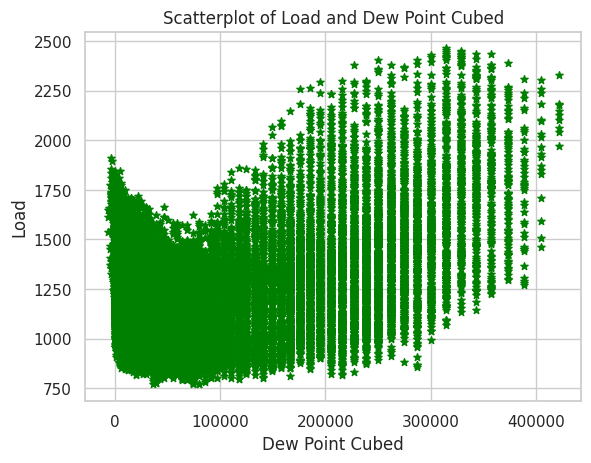

In [ ]:
plt.scatter(combined_nh_data['Dew_Point']**3, combined_nh_data['RT_Demand'], label= "stars", color= "green",
            marker= "*", s=30);
plt.xlabel('Dew Point Cubed')
plt.ylabel('Load')
plt.title("Scatterplot of Load and Dew Point Cubed")

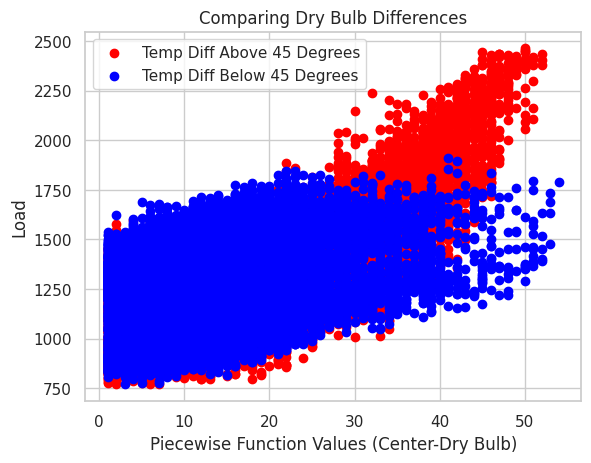

In [ ]:
plt.scatter(combined_nh_data[combined_nh_data['Dry_Bulb'] >45 ]['Dry_Bulb']-45,
            combined_nh_data[combined_nh_data['Dry_Bulb'] >45]['RT_Demand'],
            color='red', label='Temp Diff Above 45 Degrees')

plt.scatter(45-combined_nh_data[combined_nh_data['Dry_Bulb'] < 45]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Dry_Bulb'] < 45]['RT_Demand'],
            color='blue', label='Temp Diff Below 45 Degrees')
plt.xlabel('Piecewise Function Values (Center-Dry Bulb)')
plt.ylabel('Load')
plt.title('Comparing Dry Bulb Differences')

plt.legend()

# Show the plot
plt.show()

We will assume, for conciseness, that dew point will have a similar trend.

We see that the scatterplot titled "Comparing Dry Bulb Difference", shows the difference from a chosen temperature center (45 degrees in this case) and shows that our data is asymmetric.

# Date and Temperature Analysis


Let's see different effects on temperature throughout the year.

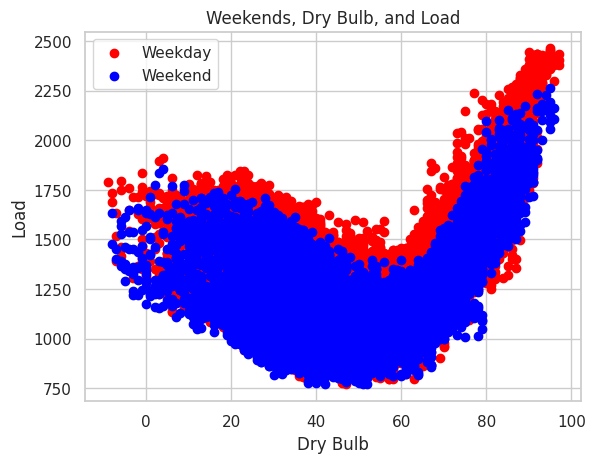

In [ ]:
#Comparing the effects of weekend and temperature on load.
combined_nh_data['Is_Weekend'] = combined_nh_data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
plt.scatter(combined_nh_data[combined_nh_data['Is_Weekend'] == False]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Is_Weekend'] == False]['RT_Demand'],
            color='red', label='Weekday')

plt.scatter(combined_nh_data[combined_nh_data['Is_Weekend'] == True]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Is_Weekend'] == True]['RT_Demand'],
            color='blue', label='Weekend')

plt.xlabel('Dry Bulb')
plt.ylabel('Load')
plt.title('Weekends, Dry Bulb, and Load')

# Add legend
plt.legend()

Weekend does affect load, with weekdays having a slight bump in load over weekends.

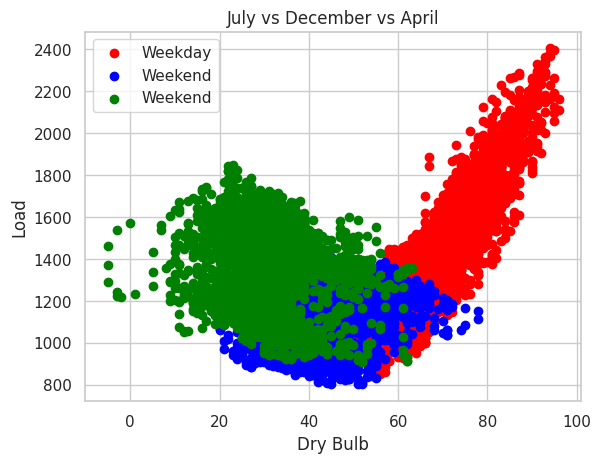

In [ ]:
plt.scatter(combined_nh_data[combined_nh_data['Month'] == 7]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Month'] == 7]['RT_Demand'],
            color='red', label='Weekday')

plt.scatter(combined_nh_data[combined_nh_data['Month'] == 4]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Month'] == 4]['RT_Demand'],
            color='blue', label='Weekend')


plt.scatter(combined_nh_data[combined_nh_data['Month'] == 12]['Dry_Bulb'],
            combined_nh_data[combined_nh_data['Month'] == 12]['RT_Demand'],
            color='green', label='Weekend')

plt.xlabel('Dry Bulb')
plt.ylabel('Load')
plt.title('July vs December vs April')

# Add legend
plt.legend()

# Feature Engineering

Feature Exploratory Visualisations

In [ ]:
combined_nh_data['Dry_Bulb_Squared'] = combined_nh_data['Dry_Bulb'] ** 2
combined_nh_data['Dew_Point_Squared'] = combined_nh_data['Dew_Point'] ** 2

combined_nh_data['Temp_DewPoint_Interaction'] = combined_nh_data['Dry_Bulb'] * combined_nh_data['Dew_Point']

combined_nh_data['Day_of_Week'] = combined_nh_data['Date'].dt.dayofweek

combined_nh_data['Is_Weekend'] = combined_nh_data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
combined_nh_data.head()

,Date,Hr_End,RT_Demand,Dry_Bulb,Dew_Point,Year,Month,DATETIME,RT_Demand_24h_avg,Dry_Bulb_24h_avg,Day_of_Week,Is_holiday,Is_Weekend,Dry_Bulb_Squared,Dew_Point_Squared,Temp_DewPoint_Interaction
0,2020-01-01,1,1080.184,32,30,2020,1,2020-01-01 00:00:00,NaN,NaN,2,True,0,1024,900,960
1,2020-01-01,2,1034.726,34,27,2020,1,2020-01-01 01:00:00,NaN,NaN,2,True,0,1156,729,918
2,2020-01-01,3,1005.343,34,26,2020,1,2020-01-01 02:00:00,NaN,NaN,2,True,0,1156,676,884
3,2020-01-01,4,1000.609,33,24,2020,1,2020-01-01 03:00:00,NaN,NaN,2,True,0,1089,576,792
4,2020-01-01,5,1011.067,31,24,2020,1,2020-01-01 04:00:00,NaN,NaN,2,True,0,961,576,744


The new features have been added to the combined_nh_data dataframe. Here's a summary of the additional features:

**Dry_Bulb_Squared**: The square of the Dry_Bulb temperature.

**Dew_Point_Squared**: The square of the Dew_Point temperature.

**Temp_DewPoint_Interaction**: An interaction term between Dry_Bulb and Dew_Point.

**Day_of_Week**: The day of the week extracted from the Date column (0 = Monday, 6 = Sunday).

**Is_Weekend**: A binary indicator for weekends (1 if weekend, 0 if weekday).

The rationale for creating an interaction term like Temp_DewPoint_Interaction between Dry_Bulb (temperature) and Dew_Point (dew point temperature) is based on the idea that the combined effect of temperature and humidity on power demand might not be simply additive.

# UDFs

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='red')

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

def print_regression_results(res):
    coef = res.params

    equation = "Price = "
    for var, value in coef.items():
        if var == 'Intercept':
            equation += f"{value:.2f}"
        else:
            if value >= 0:
                equation += f" + {value:.2f} * {var}"
            else:
                equation += f" - {abs(value):.2f} * {var}"

    return print(f"R-squared: {res.rsquared:.4f} \nAdjusted R-squared: {res.rsquared_adj:.4f} ")
    #\nRegression Equation: {equation}

# Model Development

### model RT_Demand ~ Hr_End

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5985.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:42   Log-Likelihood:            -1.8117e+05
No. Observations:               26304   AIC:                         3.623e+05
Df Residuals:                   26302   BIC:                         3.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1091.1213      3.018    361.480      0.0

Text(0.5, 1.0, 'Residual Plot for RT_Demand ~ C(Hr_End)')

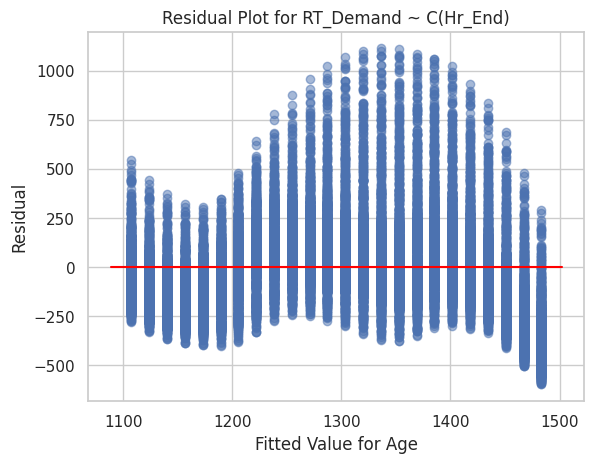

In [ ]:
mod = smf.ols(formula='RT_Demand ~ Hr_End', data=combined_nh_data)
res = mod.fit()
print(res.summary())

plt.scatter(res.fittedvalues, res.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for RT_Demand ~ C(Hr_End)')


The model shows that Hr_End is a significant predictor for RT_Demand, but it captures only a modest portion of the variance in RT_Demand. The tests for residuals indicate potential issues with non-normality and autocorrelation, suggesting that further refinement of the model or consideration of additional variables might be necessary for a more accurate prediction.

### model RT_Demand ~ C(Hr_End)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     920.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:43   Log-Likelihood:            -1.7610e+05
No. Observations:               26304   AIC:                         3.522e+05
Df Residuals:                   26280   BIC:                         3.524e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1065.2853      5.909    1

Text(0.5, 1.0, 'Residual Plot for RT_Demand ~ C(Hr_End)')

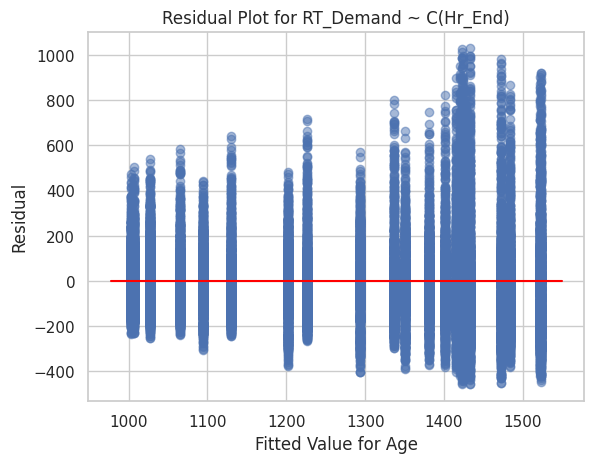

In [ ]:
mod = smf.ols(formula='RT_Demand ~ C(Hr_End)', data=combined_nh_data)
res2 = mod.fit()
print(res2.summary())
# print_regression_results(res)

plt.scatter(res2.fittedvalues, res2.resid, alpha=0.5)
abline(0,0)

plt.xlabel('Fitted Value for Age')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for RT_Demand ~ C(Hr_End)')

### model for Hr_End + Dry_Bulb + Dew_Point

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2606.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:44   Log-Likelihood:            -1.8045e+05
No. Observations:               26304   AIC:                         3.609e+05
Df Residuals:                   26300   BIC:                         3.609e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    980.1944      4.320    226.897      0.0

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point')

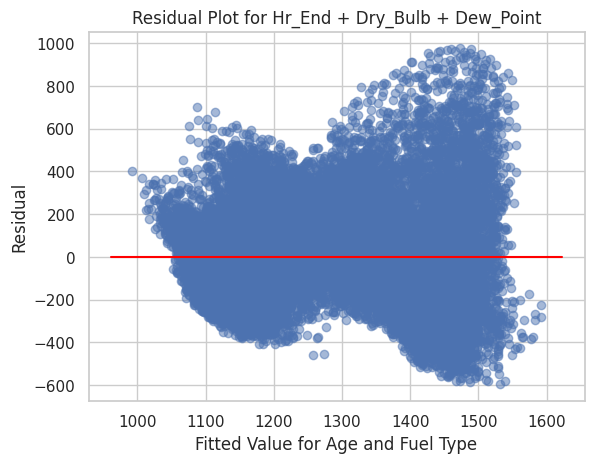

In [ ]:
mod3 = smf.ols(formula='RT_Demand ~ Hr_End + Dry_Bulb + Dew_Point', data=combined_nh_data)
res3 = mod3.fit()
print(res3.summary())
plt.scatter(res3.fittedvalues, res3.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point')

### model for  C(Hr_End) + Dry_Bulb + Dew_Point

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point')

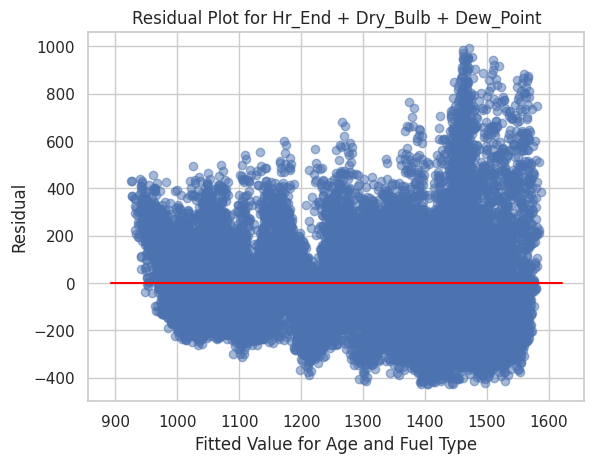

In [ ]:
mod3 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point', data=combined_nh_data)
res3 = mod3.fit()
# print(res3.summary())
# print_regression_results(res3)

plt.scatter(res3.fittedvalues, res3.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point')


### model for C(Hr_End) + Dry_Bulb + Dew_Point + I(Dew_Point**2)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2028.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:46   Log-Likelihood:            -1.6939e+05
No. Observations:               26304   AIC:                         3.388e+05
Df Residuals:                   26277   BIC:                         3.391e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1283.5898      5.54

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dew_Point**2)')

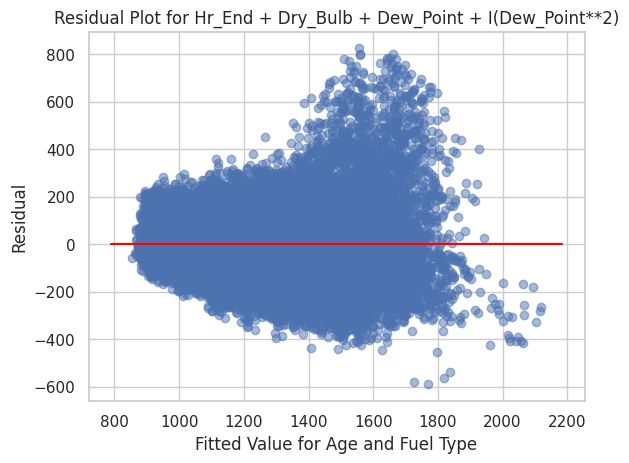

In [ ]:
mod4 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dew_Point**2)', data=combined_nh_data)
res4 = mod4.fit()
print(res4.summary())
# print_regression_results(res4)

plt.scatter(res4.fittedvalues, res4.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dew_Point**2)')

### model for C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3476.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:47   Log-Likelihood:            -1.6427e+05
No. Observations:               26304   AIC:                         3.286e+05
Df Residuals:                   26277   BIC:                         3.288e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1739.5745      5.661  

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dry_Bulb**2)')

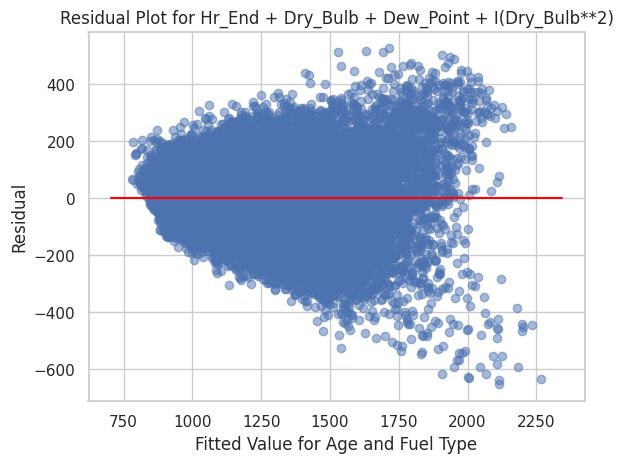

In [ ]:
# Date	Hr_End	RT_Demand	Dry_Bulb	Dew_Point	Year	Month	Dry_Bulb_Squared
# Dew_Point_Squared	Temp_DewPoint_Interaction	Day_of_Week	Is_Weekend

mod5 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2)', data=combined_nh_data)
res5 = mod5.fit()
print(res5.summary())
# print_regression_results(res5)

plt.scatter(res5.fittedvalues, res5.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dry_Bulb**2)')

### model for  C(Hr_End) + Dry_Bulb + Dew_Point + I(Dew_Point**2) + C(Day_of_Week)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1928.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:48   Log-Likelihood:            -1.6797e+05
No. Observations:               26304   AIC:                         3.360e+05
Df Residuals:                   26271   BIC:                         3.363e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1313.6099    

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dew_Point**2) + C(Day_of_Week)')

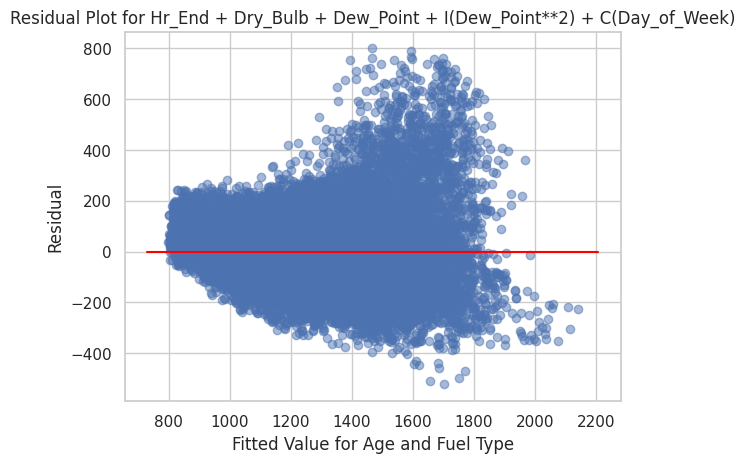

In [ ]:
mod6 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dew_Point**2) + C(Day_of_Week)', data=combined_nh_data)
res6 = mod6.fit()
print(res6.summary())
# print_regression_results(res6)

plt.scatter(res6.fittedvalues, res6.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dew_Point**2) + C(Day_of_Week)')

### model for C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)

R-squared: 0.8125 
Adjusted R-squared: 0.8123 


Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)')

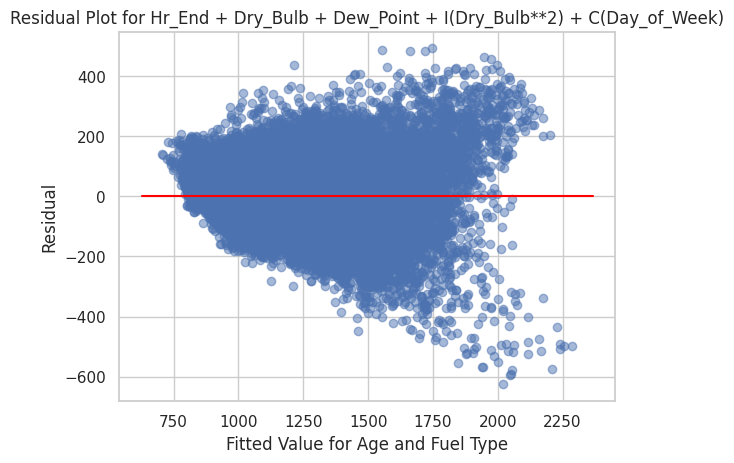

In [ ]:
mod7 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)', data=combined_nh_data)
res7 = mod7.fit()
# print(res7.summary())
print_regression_results(res7)

plt.scatter(res7.fittedvalues, res7.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and test sets
train_mask = combined_nh_data['Date'] < '2022-12-01'
test_mask = combined_nh_data['Date'] >= '2022-12-01'

train_data = combined_nh_data[train_mask]
test_data = combined_nh_data[test_mask]

# Fit the model on the training data
mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week) + I(Dry_Bulb**3)', data=train_data)
mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)', data=train_data)
# mod7 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)', data=combined_nh_data)
res7 = mod7.fit()

# Make predictions on the test data
test_data['Predictions'] = res7.predict(test_data)

# Calculate MSE and MAE
mse = mean_squared_error(test_data['RT_Demand'], test_data['Predictions'])
mae = mean_absolute_error(test_data['RT_Demand'], test_data['Predictions'])

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 11193.673913675497
Mean Absolute Error: 88.23546673352551


<ipython-input-48-4bf8d5ba9179>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = res7.predict(test_data)


### model for C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week) + I(DRYBULB **3)

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     4842.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:51   Log-Likelihood:            -1.5812e+05
No. Observations:               26304   AIC:                         3.163e+05
Df Residuals:                   26270   BIC:                         3.166e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1458.6576    

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dry_Bulb **3)+ C(Day_of_Week)')

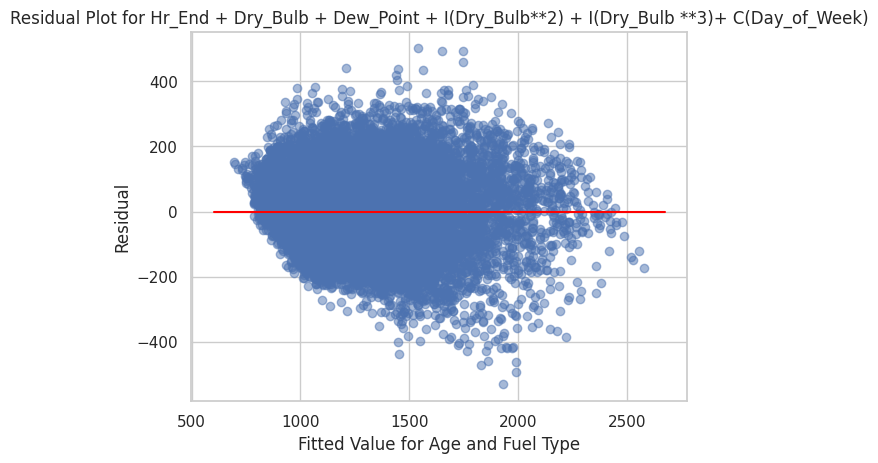

In [ ]:
mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)+ I(Dry_Bulb **3)', data=combined_nh_data)
res8 = mod8.fit()
print(res8.summary())

plt.scatter(res8.fittedvalues, res8.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Age and Fuel Type')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + I(Dry_Bulb **3)+ C(Day_of_Week)')

In [ ]:
# Importing piecewise functions to create the Distance from Center + and Distance from Center - functions


def piecewise_function_db_plus(temp):
    return np.piecewise(temp, [temp > 55, temp <= 55], [lambda x: x - 55, 0])

def piecewise_function_db_minus(temp):
    return np.piecewise(temp, [temp > 55, temp <= 55], [lambda x: 0, 55- temp])
def piecewise_function_dp_plus(temp):
    return np.piecewise(temp, [temp > 45, temp <= 45], [lambda x: x - 45, 0])

def piecewise_function_dp_minus(temp):
    return np.piecewise(temp, [temp > 45, temp <= 45], [lambda x: 0, 45- temp])


def piecewise_function_hr_minus(time):
    return np.piecewise(time, [time > 17, time <= 17], [lambda x: 0, 17- time])
def piecewise_function_hr_plus(time):
    return np.piecewise(time, [time > 17, time <= 17], [lambda x: x - 17, 0])


In [ ]:
dffull=combined_nh_data
dffull["Dry_Bulb_Diff_PW_p"]=dffull["Dry_Bulb"].apply(piecewise_function_db_plus)
dffull["Dry_Bulb_Diff_PW_n"]=dffull["Dry_Bulb"].apply(piecewise_function_db_minus)
dffull["Dew_Point_Diff_PW_p"]=dffull["Dew_Point"].apply(piecewise_function_dp_plus)
dffull["Dew_Point_Diff_PW_n"]=dffull["Dew_Point"].apply(piecewise_function_dp_minus)
dffull["HR_Diff_PW_p"]=dffull["Hr_End"].apply(piecewise_function_hr_plus)
dffull["HR_Diff_PW_n"]=dffull["Hr_End"].apply(piecewise_function_hr_minus)
combined_nh_data=dffull
month_to_season = {1: 'winter', 2: 'spring', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'winter', 12: 'winter'}



In [ ]:

combined_nh_data['season'] = combined_nh_data['Month'].map(month_to_season)



In [ ]:
combined_nh_data.columns

Index(['Date', 'Hr_End', 'RT_Demand', 'Dry_Bulb', 'Dew_Point', 'Year', 'Month',
       'DATETIME', 'RT_Demand_24h_avg', 'Dry_Bulb_24h_avg', 'Day_of_Week',
       'Is_holiday', 'Is_Weekend', 'Dry_Bulb_Squared', 'Dew_Point_Squared',
       'Temp_DewPoint_Interaction', 'Dry_Bulb_Diff_PW_p', 'Dry_Bulb_Diff_PW_n',
       'Dew_Point_Diff_PW_p', 'Dew_Point_Diff_PW_n', 'HR_Diff_PW_p',
       'HR_Diff_PW_n', 'season'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and test sets
train_mask = combined_nh_data['Date'] < '2022-12-01'
test_mask = combined_nh_data['Date'] >= '2022-12-01'

train_data = combined_nh_data[train_mask]
test_data = combined_nh_data[test_mask]

# Fit the model on the training data
mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week) + I(Dry_Bulb**3)', data=train_data)
# mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)', data=train_data)

res8 = mod8.fit()

# Make predictions on the test data
test_data['Predictions'] = res8.predict(test_data)

# Calculate MSE and MAE
mse = mean_squared_error(test_data['RT_Demand'], test_data['Predictions'])
mae = mean_absolute_error(test_data['RT_Demand'], test_data['Predictions'])

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 7459.263483731302
Mean Absolute Error: 70.01511170444518


<ipython-input-54-00e63f5fdef1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = res8.predict(test_data)


### model for C(Hr_End) + Dry_Bulb\*Day_of_Week + Dew_Point +  Dry_Bulb\*Dew_Point

                            OLS Regression Results                            
Dep. Variable:              RT_Demand   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3720.
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:54   Log-Likelihood:            -1.6280e+05
No. Observations:               26304   AIC:                         3.257e+05
Df Residuals:                   26275   BIC:                         3.259e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1597.6474 

Text(0.5, 1.0, 'Residual Plot for Hr_End + Dry_Bulb + Dew_Point + Dry_Bulb*C(DAYOFWEEK) ')

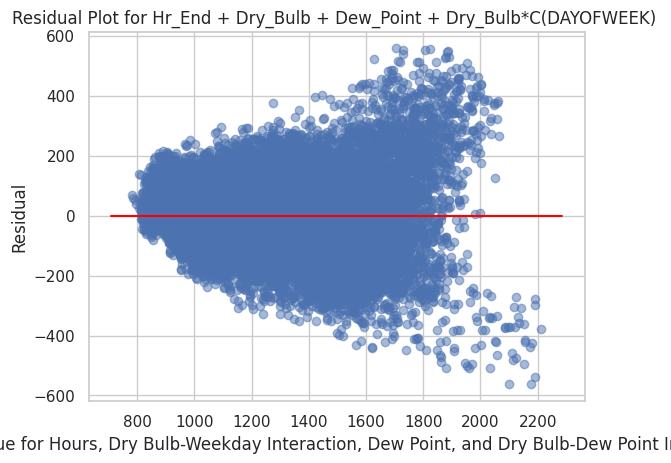

In [ ]:
mod9 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb*Day_of_Week + Dew_Point +  Dry_Bulb*Dew_Point ', data=combined_nh_data)
res9 = mod9.fit()
print(res9.summary())

plt.scatter(res9.fittedvalues, res9.resid, alpha=0.5)
abline(0,0)
plt.xlabel('Fitted Value for Hours, Dry Bulb-Weekday Interaction, Dew Point, and Dry Bulb-Dew Point Interaction')
# frequency label
plt.ylabel('Residual')
plt.title('Residual Plot for Hr_End + Dry_Bulb + Dew_Point + Dry_Bulb*C(DAYOFWEEK) ')

### Finalized Regression Model with the Most Features

In [ ]:
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and test sets
train_mask = combined_nh_data['Date'] < '2022-12-01'
test_mask = combined_nh_data['Date'] >= '2022-12-01'

train_data = combined_nh_data[train_mask]
test_data = combined_nh_data[test_mask]

# Fit the model on the training data
mod20 = smf.ols(formula='RT_Demand ~ C(Hr_End) + C(Month)\
  + Dry_Bulb \
  + I(Dry_Bulb**2) + I(Dew_Point**2) \
 + C(Day_of_Week)+ C(Is_Weekend) + I(Dry_Bulb**3) \
  +C(Is_holiday)+ I(Dry_Bulb*Dew_Point) + I(Dry_Bulb**3*Dew_Point**3) \
 + I(Dry_Bulb**2*Dew_Point**2)+ C(HR_Diff_PW_p) + np.sqrt(HR_Diff_PW_n) \
   + HR_Diff_PW_n \
 + Dew_Point_Diff_PW_n + C(season) \
  ' , data=train_data)
# mod8 = smf.ols(formula='RT_Demand ~ C(Hr_End) + Dry_Bulb + Dew_Point + I(Dry_Bulb**2) + C(Day_of_Week)', data=train_data)

res20 = mod20.fit()

# Make predictions on the test data
test_data['Predictions'] = res20.predict(test_data)

# Calculate MSE and MAE
mse = mean_squared_error(test_data['RT_Demand'], test_data['Predictions'])
mae = mean_absolute_error(test_data['RT_Demand'], test_data['Predictions'])

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 3860.6365654913598
Mean Absolute Error: 48.08786614728694


<ipython-input-56-8a1b92a51a63>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = res20.predict(test_data)


Text(0.5, 1.0, 'Residual Plot for Model 20')

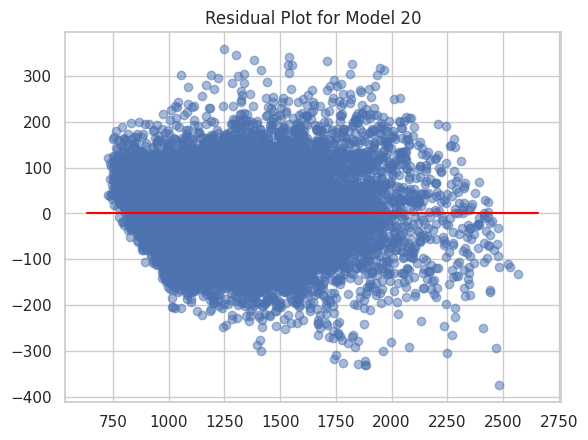

In [ ]:
# Let's plot the residual plot
plt.scatter(res20.fittedvalues, res20.resid, alpha=0.5)
abline(0,0)
# frequency label
plt.title('Residual Plot for Model 20')

### Splitting Data into Training and Test Sets

In [ ]:
#I am removing the data that I included for my finalized linear regression above.

combined_nh_data=combined_nh_data.drop(columns=['Dry_Bulb_Diff_PW_p', 'Dry_Bulb_Diff_PW_n',
       'Dew_Point_Diff_PW_p', 'Dew_Point_Diff_PW_n', 'HR_Diff_PW_p',
       'HR_Diff_PW_n', 'season'])


In [ ]:
# We are categorizing the variables.
combined_nh_data=pd.get_dummies(combined_nh_data, columns=["Hr_End", "Month", "Is_holiday", "Is_Weekend", "Day_of_Week"])


In [ ]:
from sklearn.model_selection import train_test_split

# Response variable
y = combined_nh_data['RT_Demand']

# Predictor variables
X = combined_nh_data.drop(columns=['RT_Demand', 'Date', 'DATETIME','Dry_Bulb_24h_avg', 'RT_Demand_24h_avg'])  # Excluding 'Date' and 'RT_Demand' from predictors

# Splitting the data into training and test sets
# Using the last two months of 2022 as the test set
train_mask = combined_nh_data['Date'] < '2022-12-01'
test_mask = combined_nh_data['Date'] >= '2022-12-01'

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Checking the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((25560, 53), (744, 53), (25560,), (744,))

In [ ]:
X_train.head()

,Dry_Bulb,Dew_Point,Year,Dry_Bulb_Squared,Dew_Point_Squared,Temp_DewPoint_Interaction,Hr_End_1,Hr_End_2,Hr_End_3,Hr_End_4,...,Is_holiday_True,Is_Weekend_0,Is_Weekend_1,Day_of_Week_0,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6
0,32,30,2020,1024,900,960,True,False,False,False,...,True,True,False,False,False,True,False,False,False,False
1,34,27,2020,1156,729,918,False,True,False,False,...,True,True,False,False,False,True,False,False,False,False
2,34,26,2020,1156,676,884,False,False,True,False,...,True,True,False,False,False,True,False,False,False,False
3,33,24,2020,1089,576,792,False,False,False,True,...,True,True,False,False,False,True,False,False,False,False
4,31,24,2020,961,576,744,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False


The data has been successfully split into training and test sets. The training set includes data up to November 2022, while the test set comprises data for December 2022. Here are the dimensions of the sets:

**Training Features** (X_train): 25,560 rows, 10 columns

**Test Features** (X_test): 744 rows, 10 columns

**Training Target** (y_train): 25,560 rows

**Test Target** (y_test): 744 rows

In [ ]:
X_train.head()

,Dry_Bulb,Dew_Point,Year,Dry_Bulb_Squared,Dew_Point_Squared,Temp_DewPoint_Interaction,Hr_End_1,Hr_End_2,Hr_End_3,Hr_End_4,...,Is_holiday_True,Is_Weekend_0,Is_Weekend_1,Day_of_Week_0,Day_of_Week_1,Day_of_Week_2,Day_of_Week_3,Day_of_Week_4,Day_of_Week_5,Day_of_Week_6
0,32,30,2020,1024,900,960,True,False,False,False,...,True,True,False,False,False,True,False,False,False,False
1,34,27,2020,1156,729,918,False,True,False,False,...,True,True,False,False,False,True,False,False,False,False
2,34,26,2020,1156,676,884,False,False,True,False,...,True,True,False,False,False,True,False,False,False,False
3,33,24,2020,1089,576,792,False,False,False,True,...,True,True,False,False,False,True,False,False,False,False
4,31,24,2020,961,576,744,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Linear Regression model
linear_model = LinearRegression()

# Training the model on the training data
linear_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_linear = linear_model.predict(X_test)

# Evaluating the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

linear_mse, linear_r2

(6071.210425282346, 0.820269933917505)

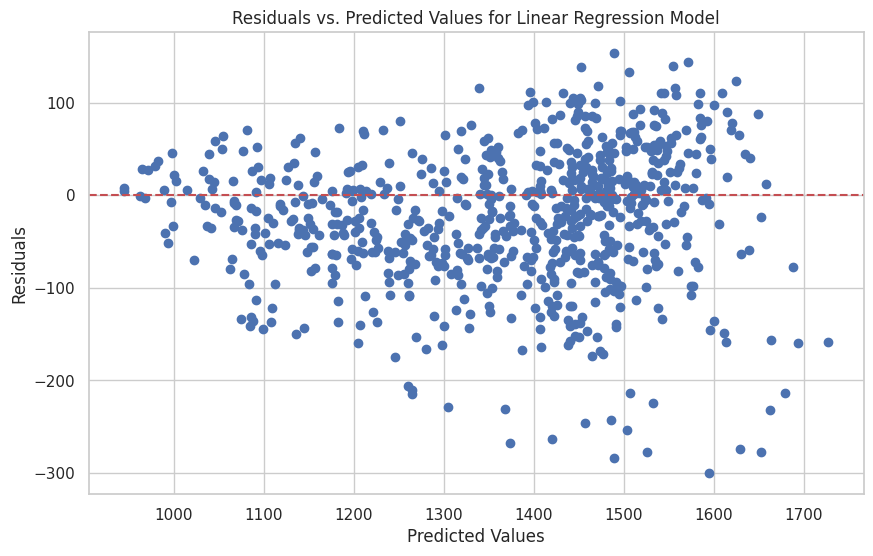

In [ ]:
# Calculating residuals for the linear regression model
residuals_linear = y_test - y_pred_linear

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values for Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# KNN

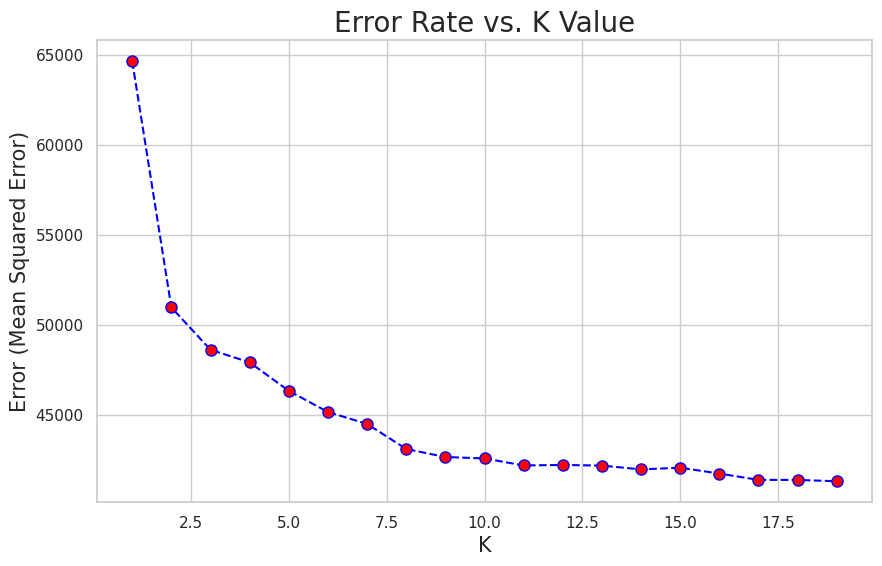

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

error_rate = []
# Will take some time
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test, pred_i))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Error (Mean Squared Error)', fontsize=15)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initializing the KNN model
knn_model = KNeighborsRegressor(n_neighbors=3)

# Training the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluating the KNN model
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)

knn_mse, knn_r2, knn_mae

(48619.8245172064, -0.4393248893181674, 177.9226164874552)

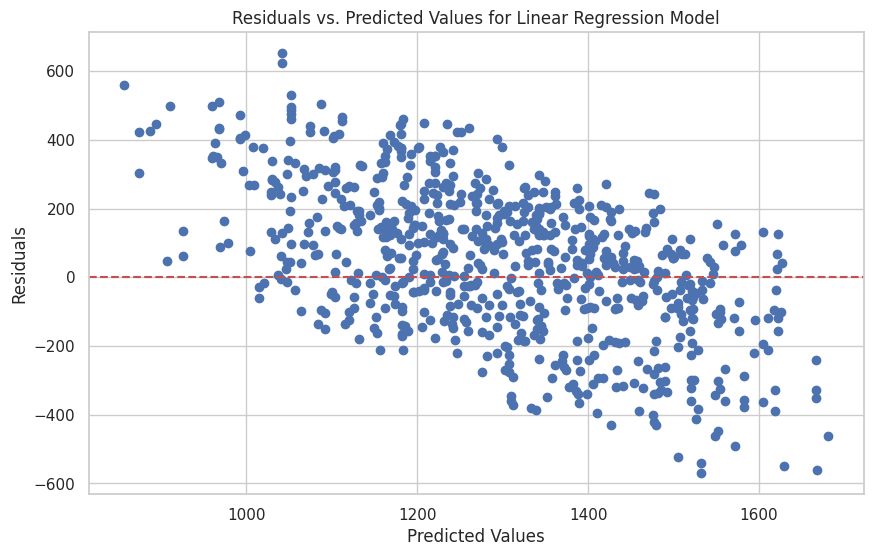

In [ ]:
# Calculating residuals for the linear regression model
residuals_knn = y_test - y_pred_knn

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals_knn)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values for Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
print(knn_model.score(X_test, y_test))

-0.4393248893181674


# RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initializing the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Training the model
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 3223.862189650348


In [ ]:
print(random_forest_model.score(X_test, y_test))

0.9045618708958243


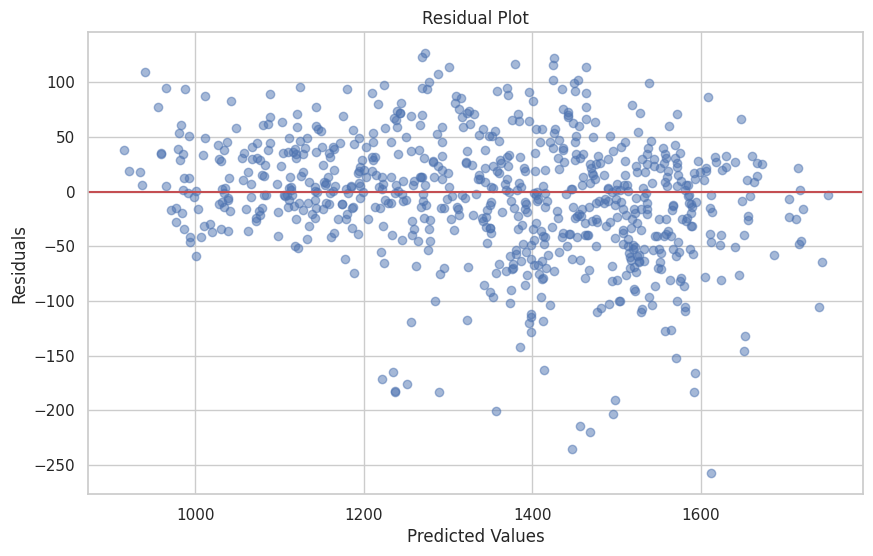

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Create a decision tree regressor as the base estimator
base_regressor = DecisionTreeRegressor()

# Create a bagging regressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=123)

# Fit the model to the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)

print(f"Mean Squared Error: {mse}", r2)


Mean Squared Error: 3332.20087740079 0.9013546489178821


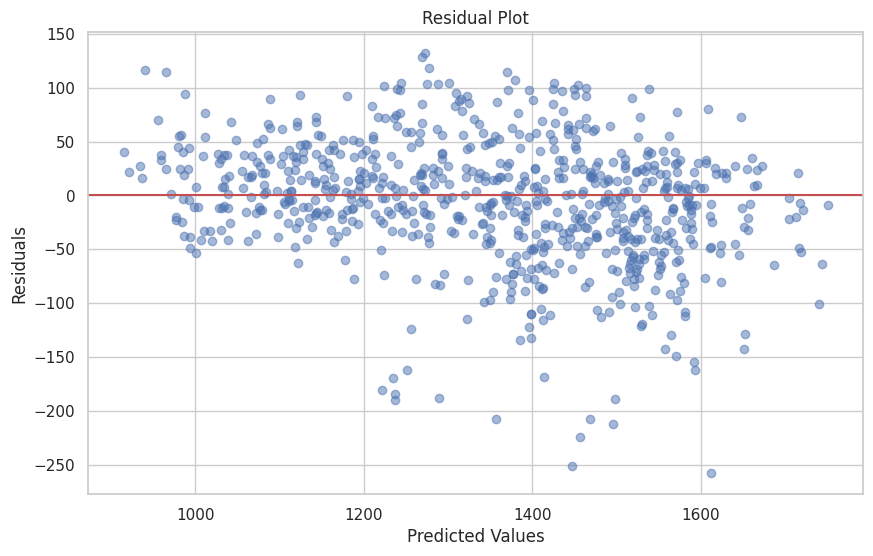

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_bagging
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_cart = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_cart)
r2 = r2_score(y_test, y_pred_cart)

print(f"Mean Squared Error: {mse}", r2 )

Mean Squared Error: 5988.5582035631705 0.8227167424171069


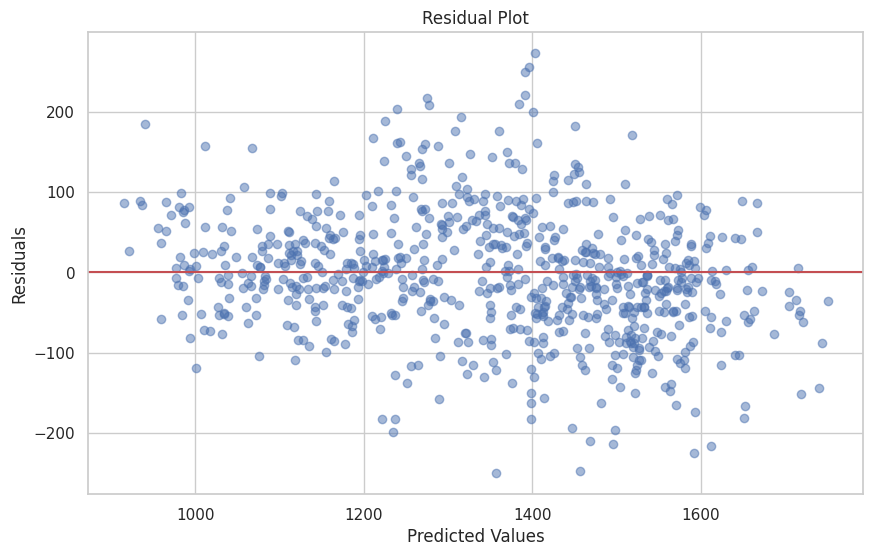

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_cart
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()